In [1]:
import os
import random
import requests
import pandas as pd
import numpy as np
import json
import matplotlib.pyplot as plt
from pprint import pprint
import scipy.stats as st
from scipy.stats import linregress
from citipy import citipy
from Config import apikey

In [2]:
# Testing Citipy
citipy.nearest_city(22.99, 120.21).city_name

'tainan'

In [3]:
latitude = []
longitude = []

for x in range(0,5000):
    latitude.append(random.uniform(-90, 90))
    longitude.append(random.uniform(-180, 180))

print(latitude, longitude)
cities = []

if len(latitude) == len(longitude):
    for x in range(0, len(latitude)):
        city = citipy.nearest_city(round(latitude[x], 6), round(longitude[x], 6))
        print(f"Searching: {round(latitude[x], 6)}, {round(longitude[x], 6)}")
        print(f"Found {city.city_name}!")
        print("----------------")
        cities.append([city.city_name, round(latitude[x], 6), round(longitude[x], 6)])

[-58.45764558507916, -68.0563629677923, 41.911831881734116, -39.759186698087106, 57.17590536165261, -53.85395769181449, 35.33264139052322, -19.900017559481995, 45.60612068172932, -84.3743227970954, -32.647989123335186, -75.78456093567502, -57.210448755274236, 46.98999581111073, 23.050817597087544, 8.912161857742873, 55.80214812551844, -6.186890763017786, -12.181962826128569, 14.937947809384426, -20.63789279976153, 38.75855519941041, -66.96840394264541, 27.423247863338332, 65.92122016276733, 72.57682531811668, -23.199996247166567, -55.43986111808522, 53.232847910346806, -8.326321298581348, -76.61991796115274, -77.15306972662265, 18.18974820827016, 82.03895220984325, 33.26702107781203, -25.917739706641186, 51.966565205189085, -66.47061686525853, 74.946226510363, -22.61786495487111, -68.49498981446175, 80.05113750538757, 78.23517481257969, 65.40037648538217, -30.175986029268692, 5.219879267376271, 59.95226997277507, 87.3498243613601, 18.15548401862665, 75.40075975680773, -74.7383372083678

In [6]:
df = pd.DataFrame(cities)
df = df.drop_duplicates(subset=0, keep=False)
df[0].value_counts()
# Table Manipulation
df = df.rename(columns={0:'City Name', 1:"Latitude", 2:"Longitude"})
df = df.reset_index()
df = df.drop(columns=['index'])
test_df = df.head(5).copy()
len(df)

935

In [7]:
test_df.head(5)

,City Name,Latitude,Longitude
0,cave,41.911832,12.975011
1,bismarck,45.606121,-100.486461
2,la cruz,23.050818,-107.444963
3,dabakala,8.912162,-4.054732
4,zolotinka,55.802148,125.452587


In [8]:
df

,City Name,Latitude,Longitude
0,cave,41.911832,12.975011
1,bismarck,45.606121,-100.486461
2,la cruz,23.050818,-107.444963
3,dabakala,8.912162,-4.054732
4,zolotinka,55.802148,125.452587
...,...,...,...
930,sergeyevka,44.474064,131.786432
931,sovetskiy,67.701500,64.998179
932,henties bay,-21.001978,10.555850
933,pergamino,-33.940726,-60.849002


In [9]:
## API Start!
df['Temperature'] = 0.0
df['Humidity'] = 0.0
df['Cloudiness'] = 0.0
df['Wind Speed'] = 0.0
df['City ID'] = np.nan
df['DateTime'] = 0

In [10]:
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime
0,cave,41.911832,12.975011,0.0,0.0,0.0,0.0,NaN,0
1,bismarck,45.606121,-100.486461,0.0,0.0,0.0,0.0,NaN,0
2,la cruz,23.050818,-107.444963,0.0,0.0,0.0,0.0,NaN,0
3,dabakala,8.912162,-4.054732,0.0,0.0,0.0,0.0,NaN,0
4,zolotinka,55.802148,125.452587,0.0,0.0,0.0,0.0,NaN,0
...,...,...,...,...,...,...,...,...,...
930,sergeyevka,44.474064,131.786432,0.0,0.0,0.0,0.0,NaN,0
931,sovetskiy,67.701500,64.998179,0.0,0.0,0.0,0.0,NaN,0
932,henties bay,-21.001978,10.555850,0.0,0.0,0.0,0.0,NaN,0
933,pergamino,-33.940726,-60.849002,0.0,0.0,0.0,0.0,NaN,0


In [11]:
# Perform API Calls
# Perform a weather check on each city using a series of successive API calls.
# Include a print log of each city as it's being processed (with the city number and city name).

# Build the URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = 'metric'
lat = ''
lon = ''
query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"


for i, row in df.iterrows():
    c = row['City Name']
    lat = row['Latitude']
    lon = row['Longitude']
    query_url = f"{url}&units=imperial&lat={lat}&lon={lon}"
    response = requests.get(query_url + f"&appid={apikey}").json()
    df.at[i, 'Humidity'] = response['main']['humidity']
    df.at[i, 'Temperature'] = response['main']['temp']
    df.at[i, 'Cloudiness'] = response['clouds']['all']
    df.at[i, 'Wind Speed'] = response['wind']['speed']
    df.at[i, 'DateTime'] = response['dt']
    if response['id'] > 0:
        df.at[i, 'City ID'] = response['id']
        print(f"City:{response['name']} w/ City ID:{response['id']} found!")
    else:
        print(f"**** No city found, delete this row! ****")
        
print("Api calls are completed!")

City:Pisoniano w/ City ID:3170626 found!
City:Mobridge w/ City ID:5767189 found!
City:Mazatlán w/ City ID:3996322 found!
City:Dabakala w/ City ID:2290609 found!
City:Tynda w/ City ID:2014718 found!
City:Sumenep w/ City ID:1626099 found!
City:Mundgod w/ City ID:1262510 found!
City:Sarikoran w/ City ID:1165955 found!
City:Kamenka w/ City ID:553609 found!
City:Bokhan w/ City ID:2026544 found!
City:Alegrete w/ City ID:3472638 found!
City:Buchanan w/ City ID:2278158 found!
City:Al Hufūf w/ City ID:109571 found!
City:Baharly w/ City ID:162158 found!
City:Winnett w/ City ID:5686862 found!
City:Darapidap w/ City ID:1715478 found!
City:Angul w/ City ID:1278593 found!
City:Kahrīz w/ City ID:23814 found!
City:Quyang w/ City ID:1797271 found!
City:Omaheke w/ City ID:3371205 found!
City:Garangwala w/ City ID:1178915 found!
City:Moussoro w/ City ID:2427336 found!
City:Polsenz w/ City ID:2768552 found!
City:Tauramena w/ City ID:3667355 found!
City:Eoropie w/ City ID:2649966 found!
City:Krasnoyarskaya

In [14]:
response

{'coord': {'lon': -57.7404, 'lat': 48.7538},
 'weather': [{'id': 804,
   'main': 'Clouds',
   'description': 'overcast clouds',
   'icon': '04d'}],
 'base': 'stations',
 'main': {'temp': 67.84,
  'feels_like': 68.56,
  'temp_min': 63.03,
  'temp_max': 68.38,
  'pressure': 1008,
  'humidity': 90,
  'sea_level': 1008,
  'grnd_level': 957},
 'visibility': 10000,
 'wind': {'speed': 11.39, 'deg': 209, 'gust': 18.21},
 'clouds': {'all': 100},
 'dt': 1626802609,
 'sys': {'type': 1,
  'id': 781,
  'country': 'CA',
  'sunrise': 1626768580,
  'sunset': 1626824677},
 'timezone': -9000,
 'id': 6155806,
 'name': 'Steady Brook',
 'cod': 200}

In [12]:
df['City ID'].value_counts()

2019867.0    2
2120047.0    2
550102.0     2
605314.0     2
1637339.0    2
            ..
2146193.0    1
2562816.0    1
621074.0     1
3459681.0    1
4520081.0    1
Name: City ID, Length: 768, dtype: int64

In [13]:
df.drop_duplicates(subset=['City ID'], keep='first', inplace=True)
df.dropna(axis=0, how='any', inplace=True)
df['City ID'] = df['City ID'].astype(int)
df

,City Name,Latitude,Longitude,Temperature,Humidity,Cloudiness,Wind Speed,City ID,DateTime
0,cave,41.911832,12.975011,78.22,53.0,43.0,2.91,3170626,1626805046
1,bismarck,45.606121,-100.486461,87.82,40.0,1.0,18.41,5767189,1626805046
2,la cruz,23.050818,-107.444963,84.72,67.0,7.0,3.60,3996322,1626805047
3,dabakala,8.912162,-4.054732,79.12,69.0,94.0,3.29,2290609,1626805047
4,zolotinka,55.802148,125.452587,55.26,99.0,95.0,4.07,2014718,1626805047
...,...,...,...,...,...,...,...,...,...
928,san juan del sur,10.914286,-86.467996,82.99,81.0,61.0,25.84,3616726,1626805287
929,kurush,41.113679,48.102600,46.02,65.0,39.0,2.24,585231,1626805287
930,sergeyevka,44.474064,131.786432,71.67,99.0,39.0,4.68,2012573,1626805287
931,sovetskiy,67.701500,64.998179,50.85,95.0,81.0,15.01,1491229,1626805287


In [14]:
df.to_csv("../exported_city_data.csv")

north_df = df.loc[df['Latitude'] >= 0]
south_df = df.loc[df['Latitude'] < 0]

In [83]:
# Make a thing that can scatterplot on repeat
graph_list = ['Temperature', "Humidity", 'Cloudiness', 'Wind Speed']

def scatterPlotIt(col, name, df, hem_name):
    x = df
    hem_name = 99
    (slope, intercept, rvalue, pvalue, stderr) = st.linregress(x.iloc[:,1], x.iloc[:,col])
    regress_values = x.iloc[:,1] * slope + intercept
    line_eq = "y = " + str(round(slope, 2)) + "x + " + str(round(intercept, 2))
    cc = st.pearsonr(x.iloc[:,col], x.iloc[:,1])
    plt.scatter(x.iloc[:,1], x.iloc[:,col], facecolors="red", edgecolors="black", alpha=.8)
    plt.grid()
    plt.xlabel(f"Latitude")
    plt.ylabel(f"{name}")
    if hem_name == 0:
        plt.title(f"{name} vs Latitude in The Northern Hemisphere")
    if hem_name == 1:
        plt.title(f"{name} vs Latitude in The Southern Hemisphere")
    else:
        plt.title(f"{name} vs Latitude in the World")


#     Draw the Line
    plt.plot(x.iloc[:,1], regress_values)

#     Setting the Min and Max limitations to dynamically put the annotations
    ymin = x.iloc[:,col].min()
    xmin = x.iloc[:,1].min()
    ymax = x.iloc[:,col].max()
    xmax = x.iloc[:,1].max()
    plt.ylim(ymin - (ymin * .1), (ymax + ymax * .10))
    plt.annotate(line_eq, (xmin + 1,ymax + 3))
#     plt.annotate(f"Correlation Coefficient: {round(cc[0], 5)} {round(cc[1], 7)}", (1, 1))
    plt.show()




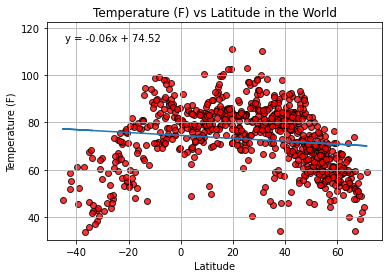

<Figure size 432x288 with 0 Axes>

In [85]:
scatterPlotIt(3, "Temperature (F)", df, 99)
plt.savefig(f"Temperature (F) vs Latitude in the World")

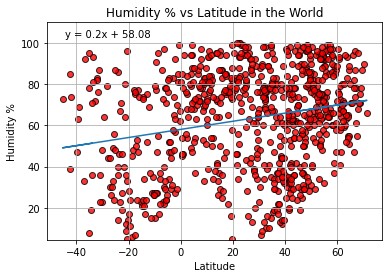

<Figure size 432x288 with 0 Axes>

In [86]:
scatterPlotIt(4, "Humidity %", df, 99)
plt.savefig(f"Humidity % vs Latitude in the World")

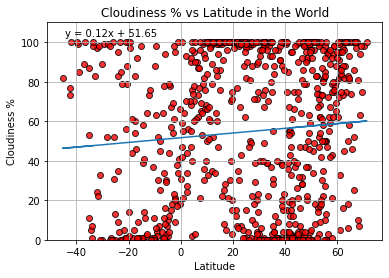

<Figure size 432x288 with 0 Axes>

In [87]:
scatterPlotIt(5, "Cloudiness %", df, 99)
plt.savefig(f"Cloudiness % vs Latitude in the World")

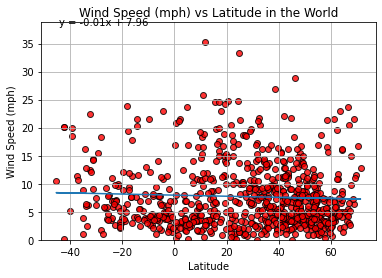

<Figure size 432x288 with 0 Axes>

In [88]:
scatterPlotIt(6, "Wind Speed (mph)", df, 99)
plt.savefig(f"Wind Speed (mph) vs Latitude in the World")

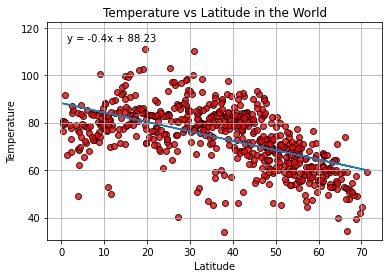

<Figure size 432x288 with 0 Axes>

In [97]:
scatterPlotIt(3, graph_list[0], north_df, 0)
plt.savefig(f"{graph_list[0]} (F) vs Latitude in The Northern Hemisphere")

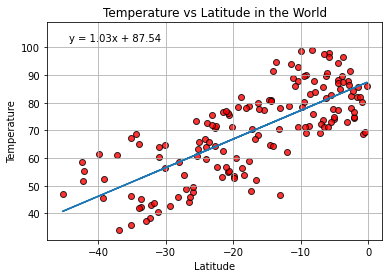

<Figure size 432x288 with 0 Axes>

In [98]:
scatterPlotIt(3, graph_list[0], south_df, 1)
plt.savefig(f"{graph_list[0]} (F) vs Latitude in The Southern Hemisphere")

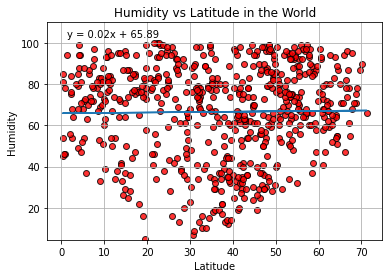

<Figure size 432x288 with 0 Axes>

In [91]:
scatterPlotIt(4, graph_list[1], north_df, 0)
plt.savefig(f"{graph_list[1]} vs Latitude in The Northern Hemisphere")

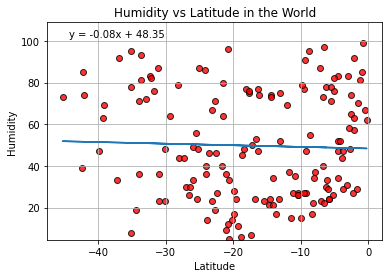

<Figure size 432x288 with 0 Axes>

In [92]:
scatterPlotIt(4, graph_list[1], south_df, 1)
plt.savefig(f"{graph_list[1]} vs Latitude in The Southern Hemisphere")

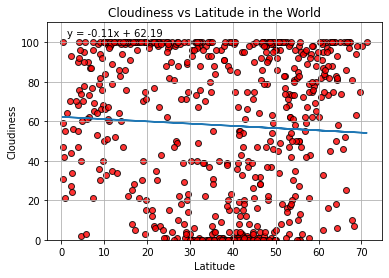

<Figure size 432x288 with 0 Axes>

In [93]:
scatterPlotIt(5, graph_list[2], north_df, 0)
plt.savefig(f"{graph_list[2]} vs Latitude in The Northern Hemisphere")

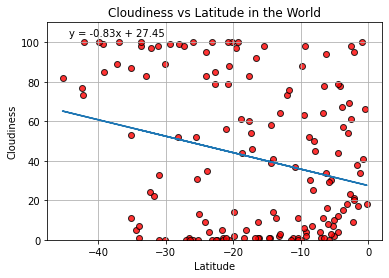

<Figure size 432x288 with 0 Axes>

In [94]:
scatterPlotIt(5, graph_list[2], south_df, 1)
plt.savefig(f"{graph_list[2]} vs Latitude in The Southern Hemisphere")

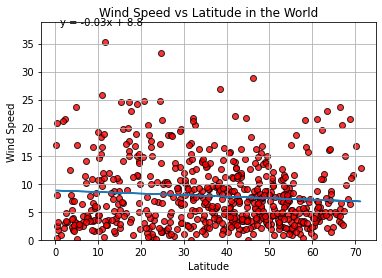

<Figure size 432x288 with 0 Axes>

In [95]:
scatterPlotIt(6, graph_list[3], north_df, 0)
plt.savefig(f"{graph_list[3]} vs Latitude in The Northern Hemisphere")

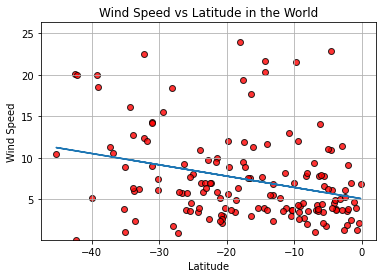

<Figure size 432x288 with 0 Axes>

In [96]:
scatterPlotIt(6, graph_list[3], south_df, 1)
plt.savefig(f"{graph_list[3]} vs Latitude in The Southern Hemisphere")